In [1]:
%run ../../../utils/commonImports.py
%run ../../../utils/tradingImports.py
%matplotlib inline

from base import supres
from exputils import *

C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Load data

In [7]:
dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
# dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'
features = ['change_1', 'change_2', 'change_3']
pairs = read_tsv('selected-pairs.tsv', header=None)[0].tolist()

# data_dict = {p: read_all(p, dropbox_dir) for p in pairs}
train = read_tsv('train.tsv')

In [8]:
train.head()

,index,support,pair,win_size,date,max_profit,change_1,change_2,change_3
0,24.0000,0.0021,BTC_ETH,4,2016-01-01 12:00:00,0.0725,0.0000,0.0000,0.0000
1,33.0000,0.0022,BTC_ETH,4,2016-01-01 16:30:00,0.0543,0.0089,0.0000,0.0000
2,45.0000,0.0022,BTC_ETH,4,2016-01-01 22:30:00,0.0680,-0.0015,0.0074,0.0000
3,58.0000,0.0022,BTC_ETH,4,2016-01-02 05:00:00,0.0441,0.0234,0.0218,0.0309
4,70.0000,0.0022,BTC_ETH,4,2016-01-02 11:00:00,0.0387,0.0034,0.0269,0.0253


In [33]:
def decision(r):
    if r['max_profit'] >= -r['change_1']:
        return -r['change_1']
    else:
        return r['max_profit']

train['max_profit_consolidated'] = train.apply(lambda r: decision(r), axis=1)

# Train validation split

In [34]:
from sklearn.model_selection import train_test_split

X = train[features].values
y = train['max_profit_consolidated'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Report

In [55]:
from sklearn.metrics import mean_squared_error

def plt_reg(x, y, ax, title, xlabel, ylabel):
    sns.regplot(x, y, ax=ax)
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=axis_font)
    ax.set_ylabel(ylabel, fontproperties=axis_font)

def reg_report(X, y_true, reg):
    y_pred = reg.predict(X)
    ms_err = mean_squared_error(y_true, y_pred)
    print('Mean squared error', ms_err)
    
    _, axes = plt.subplots(1, 2, figsize=[13, 5])
    plt_reg(X[:, 0], y_true, axes[0], 'True', 'change_1', 'y_true')
    plt_reg(X[:, 0], y_pred, axes[1], 'Predicted', 'change_1', 'y_pred')
    
    plt.figure(figsize=[12, 6])
    sns.regplot(y_true, y_pred)
    plt.xlabel('y_true', fontproperties=axis_font)
    plt.ylabel('y_pred', fontproperties=axis_font)
    plt.title('True - Pred comparison', fontproperties=title_font)

# Linear regression

In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train set report

Mean squared error 0.00011267938083928449


C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


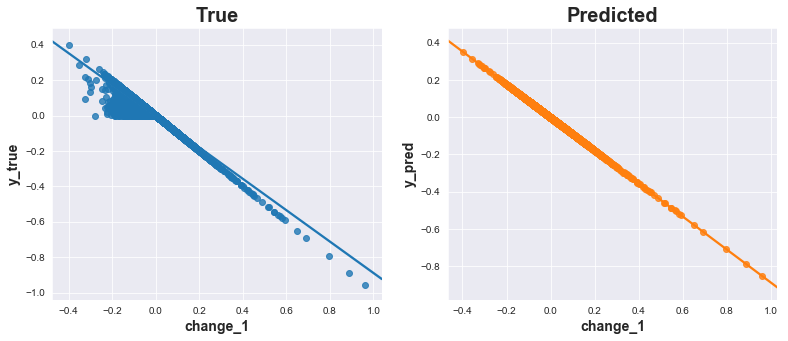

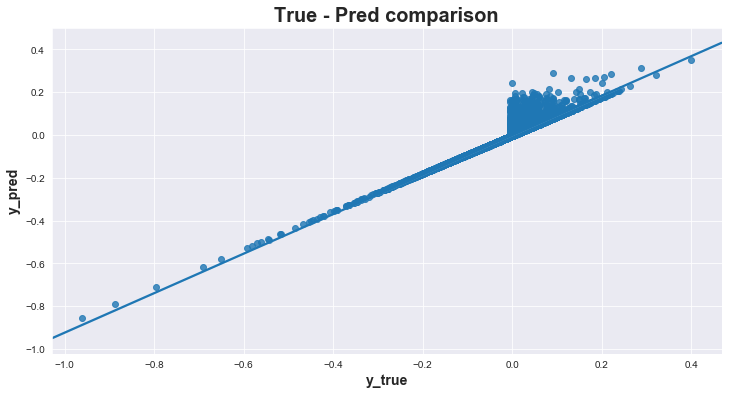

In [57]:
y_true = y_train
reg_report(X_train, y_true, reg)

### Validation set report

Mean squared error 0.00010756093020387258


C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


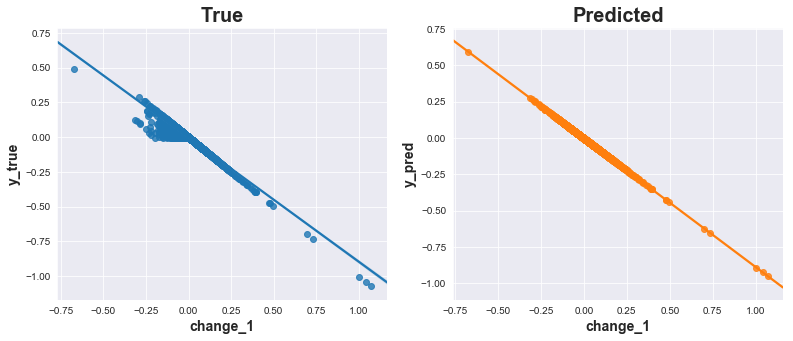

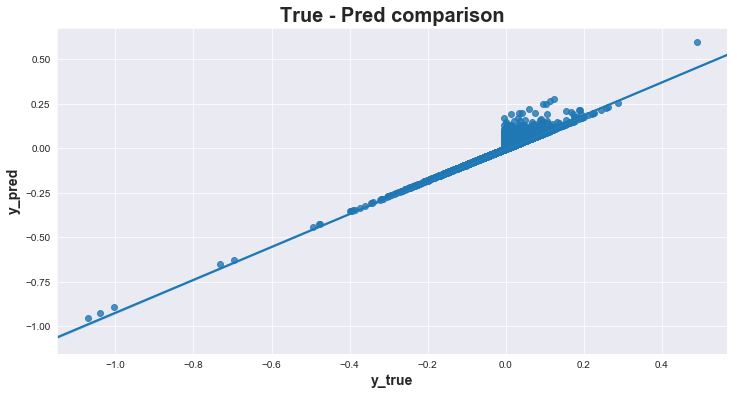

In [58]:
y_true = y_val
reg_report(X_val, y_true, reg)

# Save Regression

In [59]:
from sklearn.linear_model import LinearRegression

reg_all = LinearRegression()
reg_all.fit(X, y)
save_model(reg_all, 'models/lin_regression.pkl')